In [1]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.shape

(768, 9)

In [6]:
data.columns

Index(['Pregnancies', 'Glucose', 'BP', 'SkinThickness', 'Insulin', 'BMI',
       'DPF', 'Age', 'Outcome'],
      dtype='object')

#### rename **D**iabetes**P**edigree**F**unction column to DPF and **B**Lood**P**ressure to BP for bettre consistency 

In [32]:
data=data.rename(columns ={"DiabetesPedigreeFunction": "DPF", "BloodPressure": "BP" })

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BP             768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   DPF            768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


###  Data Dictionary 

##### Pregnancies - Number of times pregnant

##### Glucose - Plasma glucose concentration - 2 hours in an oral glucose tolerance test

##### BloodPressure - Diastolic blood pressure (mm Hg)

##### SkinThickness - Triceps skin fold thickness (mm)

##### Insulin - 2-Hour serum insulin (mu U/ml)

##### BMI - Body mass index

##### DiabetesPedigreeFunction - Diabetes pedigree function

##### Age - Age (years)

##### Outcome - Class variable (0 or 1)

In [ ]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

#### The largest proportion of samples are not diabetic 
#### for better eye view, let's visaulize it using pieplot

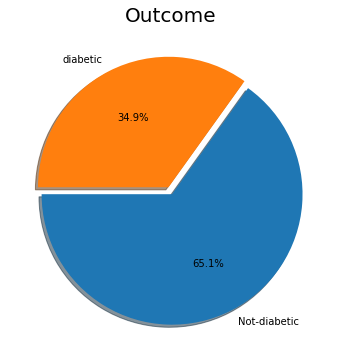

In [9]:
pie=data["Outcome"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(pie, labels=["Not-diabetic", "diabetic"],
        explode=[0.03,0.03],
        startangle=180,
        autopct='%1.1f%%',shadow=True)
plt.title('Outcome', fontsize=20)
plt.show()

### Summary statistics

In [27]:
data.describe()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### we can see that there are samples with minimum BloodPressure, Glucose ..etc  equel to  ***zero***  
### this does't make any senes, unless this person is dead. so, this obviously is an error and we have to deal with
#### So, we are going to replace all values that take zero with Nan,
#### but Pregnancies; because it may be a woman that has never been pregnant before or she is not pregnant now or may this sample belongs to a man. 

In [35]:
# note here we excloded Pregnancies and Insulin columns.
col=["Glucose","BP","SkinThickness","BMI"]
for i in col:
    data[i].replace(0, np.nan, inplace=True)

In [34]:
data.isna().sum()

Pregnancies        0
Glucose            5
BP                35
SkinThickness    227
Insulin            0
BMI               11
DPF                0
Age                0
Outcome            0
dtype: int64

#### we can observe that there are alot of missingness in Glucose, BloodPressure, SkinThickness, Insulin and BMI
#### let's see the percentage and distribution of missingness in our dataset

In [13]:
# import missingno package as it's very helpful for visualizing the missing values
import missingno as msno

/usr/local/lib/python3.7/dist-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  "Plotting a sparkline on an existing axis is not currently supported. "


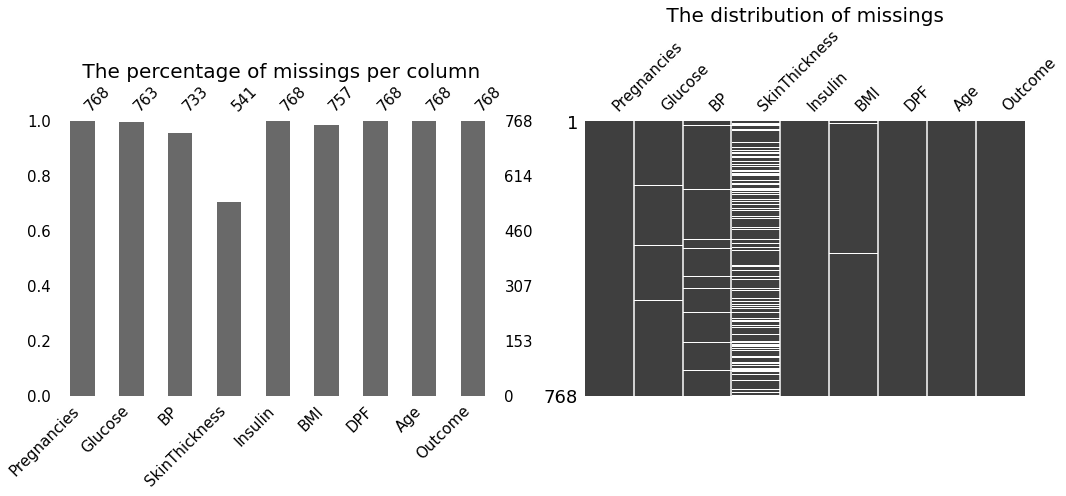

In [51]:
fig=plt.figure(figsize=(15,7))
ax1=fig.add_subplot(1,2,1)
ax1.set_title(" The percentage of missings per column", fontsize=20)
msno.bar(data, fontsize=15, ax=ax1)
ax2=fig.add_subplot(1,2,2)
ax2.set_title(" The distribution of missings ", fontsize=20)
msno.matrix(data, fontsize=15, ax=ax2)
plt.tight_layout()

### we can see that ther are alot of misssings in our data, and randomly distributed which means that missing completely at random as there is no systemic relationship between missing value and the remaining values
### it's may be data entry error when imputting data.

In [ ]:
missing=data[data['SkinThickness'].isna()]
complete=data[~data['SkinThickness'].isna()]

In [ ]:
missing.describe()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Outcome
count,227.000000,227.000000,194.000000,0.0,0.0,218.000000,227.000000,227.000000
mean,4.638767,123.449339,75.025773,NaN,NaN,31.373853,0.393291,0.387665
std,3.350062,29.572931,12.305454,NaN,NaN,6.952505,0.276871,0.488294
min,0.000000,44.000000,48.000000,NaN,NaN,18.200000,0.078000,0.000000
25%,2.000000,105.000000,66.000000,NaN,NaN,25.925000,0.203000,0.000000
50%,4.000000,120.000000,74.500000,NaN,NaN,30.850000,0.282000,0.000000
75%,7.000000,140.500000,82.000000,NaN,NaN,35.300000,0.536500,1.000000
max,13.000000,197.000000,122.000000,NaN,NaN,52.900000,1.781000,1.000000


In [ ]:
complete.describe()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Outcome
count,541.000000,536.000000,539.000000,541.000000,394.000000,539.000000,541.000000,541.000000
mean,3.512015,120.940299,71.461967,29.153420,155.548223,32.895733,0.504850,0.332717
std,3.324759,30.931159,12.284724,10.476982,118.775855,6.871851,0.346639,0.471622
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,0.000000
25%,1.000000,98.750000,64.000000,22.000000,76.250000,27.850000,0.259000,0.000000
50%,2.000000,115.000000,72.000000,29.000000,125.000000,32.800000,0.417000,0.000000
75%,5.000000,141.000000,80.000000,36.000000,190.000000,36.900000,0.660000,1.000000
max,17.000000,199.000000,110.000000,99.000000,846.000000,67.100000,2.420000,1.000000


### here we can observe that SkinThickness has been missed in the high-level of Insulin

### but for better eye view let's visualize it  

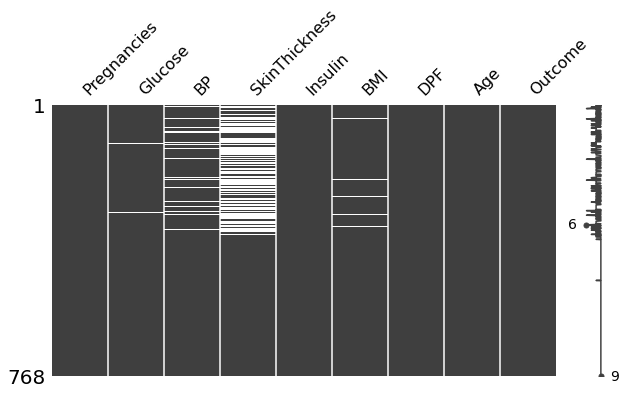

In [50]:
newdata=data.sort_values(by="Insulin")
msno.matrix(newdata, figsize=(10,5))

In [ ]:
    data.groupby(['Outcome']).median().reset_index()

,Outcome,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,BloodPressure
0,0,2,107.0,70.0,27.0,102.5,30.1,0.336,27,70.0
1,1,4,140.0,74.5,32.0,169.5,34.3,0.449,36,74.5


In [52]:
data.loc[(data['Outcome']==0) & (data['BMI'].isnull()),'BMI'] =30.1
data.loc[(data['Outcome']==1) & (data['BMI'].isnull()),'BMI'] =30.1

data.loc[(data['Outcome']==0) & (data['Glucose'].isnull()),'Glucose'] =107.0
data.loc[(data['Outcome']==1) & (data['Glucose'].isnull()),'Glucose'] =140.0

data.loc[(data['Outcome']==0) & (data['BP'].isnull()),'BP'] =70.0
data.loc[(data['Outcome']==1) & (data['BP'].isnull()),'BP'] =74.5

data.loc[(data['Outcome']==0) & (data['SkinThickness'].isnull()),'SkinThickness'] =27.0
data.loc[(data['Outcome']==1) & (data['SkinThickness'].isnull()),'SkinThickness'] =32.0

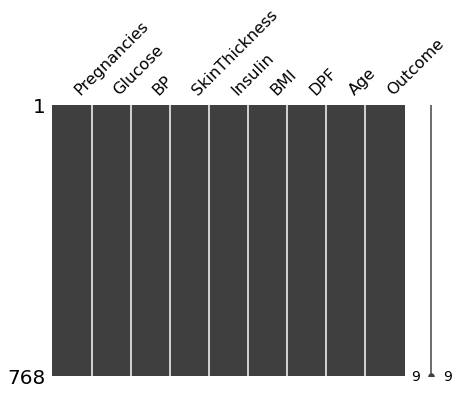

In [53]:
#### check that there is no Nan values any more
msno.matrix(data,figsize=(7,5))

###from summary statistics.
### the min of Age is 21 and mean is 33, the first quartile of our sample age is between 21 and 24
### but for better eye view let's display boxplot

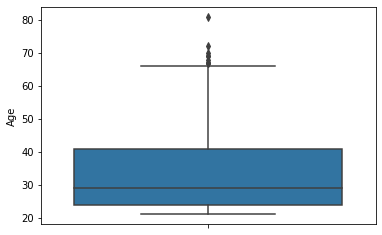

In [ ]:
sns.boxplot(y=data["Age"])
plt.show()

### it sounds we have many outliers here.
#### let's collapse Age into few categories

In [ ]:
ranges=[21,30,40,50,60,np.inf]
labels=["21-30","30-40","40-50","50-60","60+"]
data["Age"]=pd.cut(data["Age"],labels=labels, bins=ranges)

<Figure size 720x720 with 0 Axes>

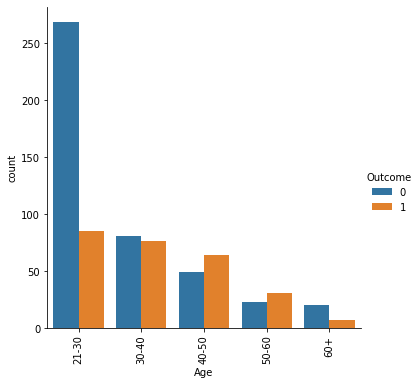

In [ ]:
plt.figure(figsize=(10,10))
sns.catplot(data=data, x="Age", kind="count", hue="Outcome")
plt.xticks(rotation=90)
plt.show()
#countplot

### Through this right-skewed distribution, we can observe that just the age of the person is not a good indicator of diabetes, but we can say that "young people from 21-to-30 have a lower chance of being diabestic".

In [57]:
def box(var):
    sns.scatterplot(x="Glucose", y=var, data=data, hue="Outcome",size="Insulin", style="Outcome")

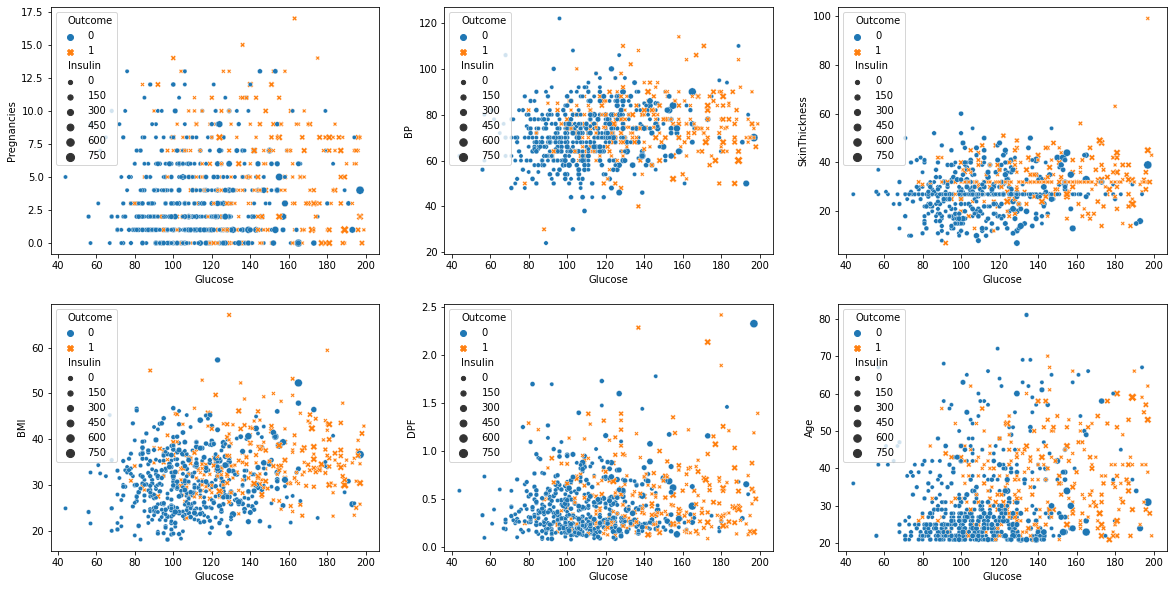

In [60]:
fig, ax = plt.subplots(2, 3,figsize=(20,10))
plt.subplot(2,3,1)
box('Pregnancies')
plt.subplot(2,3,2)
box('BP')
plt.subplot(2,3,3)
box('SkinThickness')
plt.subplot(2,3,4)
box('BMI')
plt.subplot(2,3,5)
box("DPF")
plt.subplot(2,3,6)
box("Age")

### Obviosly the percentage of Glucose and Insulin is the strongest indicators in our dataset. The relation ship betteewn Glucose-level and be diabestic is degraded relationship as, the more Glucose-higher-in-level, the more chances for the sample to be diabestic.

### there are less number of people with high Glucose-level beteewn 150-to-200 they have very higher chances to be diabestic and very less number of people is not-diabestic due to the heigh-level-of-Glucose  

### Over-Pregnancy-range with high-glucose-level have Diabetes.
### As BMI increase, and Glucose, there are higher-chances to be diabestic.

### The BloodPressure lies between 40 and 100 with less number of people with diabetes in this range.

### Middle aged people with high Glucose level and high BloodPressure level have higher chances of Diabetes which is quite intuitive as well.

#### let's check if there any duplicates whethere complete-duplicates or duplicates with small-discrepancies

In [62]:
column_names=["Age","Glucose","Insulin","Outcome"]
duplicates=data.duplicated(subset=column_names, keep=False)
data[duplicates].sort_values(by = "Age")

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
626,0,125.0,68.0,27.0,0,24.7,0.206,21,0
102,0,125.0,96.0,27.0,0,22.5,0.262,21,0
145,0,102.0,75.0,23.0,0,30.1,0.572,21,0
268,0,102.0,52.0,27.0,0,25.1,0.078,21,0
75,1,107.0,48.0,20.0,0,24.7,0.140,22,0
416,1,97.0,68.0,21.0,0,27.2,1.095,22,0
118,4,97.0,60.0,23.0,0,28.2,0.443,22,0
342,1,107.0,68.0,35.0,0,32.0,0.389,22,0
632,2,111.0,60.0,27.0,0,26.2,0.343,23,0
249,1,111.0,86.0,19.0,0,30.1,0.143,23,0


### It semms that we have sam samples with small-discrepancies 

In [ ]:
print(data[duplicates].shape)

(26, 9)


In [69]:
summaries={"Pregnancies":"mean", "BP": "mean" , "BMI":"mean", "DPF":"mean", "SkinThickness":"mean" }
data = data.groupby(by = column_names).agg(summaries).reset_index()
data.shape

(755, 9)

### let's find out more about the spread of our dataset.

In [64]:
def box(var):
    sns.boxplot(x="Outcome", y=var, data=data,palette='rainbow')

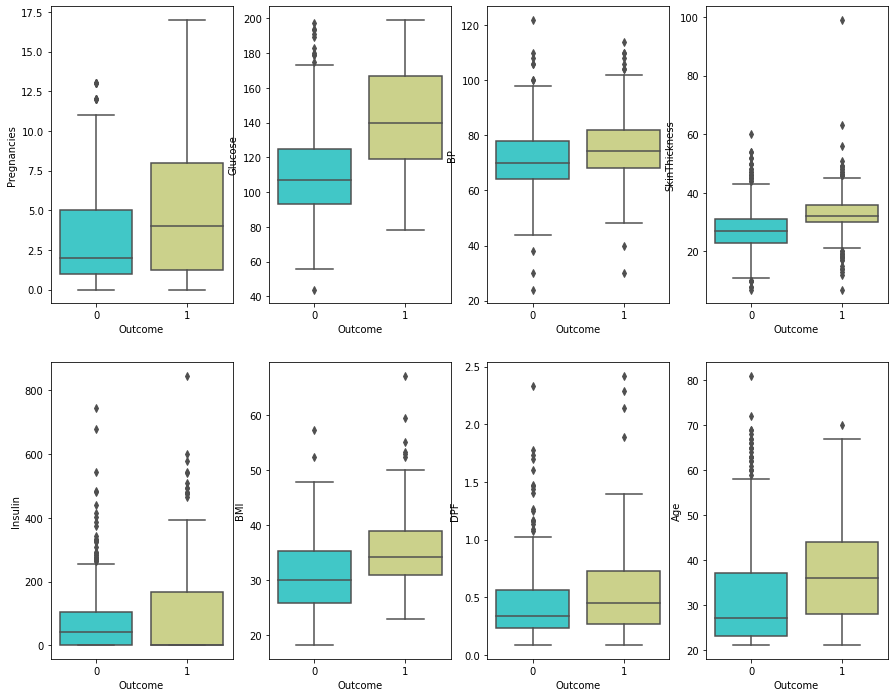

In [68]:
fig, ax = plt.subplots(2, 3,figsize=(15,12))
plt.subplot(2,4,1)
box('Pregnancies')
plt.subplot(2,4,2)
box('Glucose')
plt.subplot(2,4,3)
box('BP')
plt.subplot(2,4,4)
box('SkinThickness')
plt.subplot(2,4,5)
box('Insulin')
plt.subplot(2,4,6)
box('BMI')
plt.subplot(2,4,7)
box("DPF")
plt.subplot(2,4,8)
box("Age")

####They are a very less number of outliers in all features.

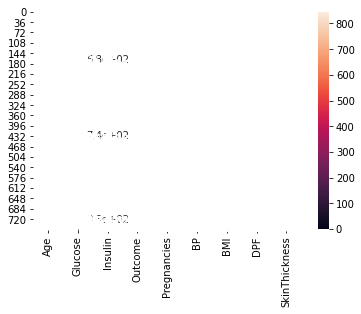

In [82]:
heat = sns.heatmap(data, linewidths=.5, annot=True)

#### There is no apparent linear correlation between feature variable according to the heatmap.

## data preprocessing